/opt/tljh/user/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


std:  1269.4567703080754
mean:  977.1190476190476


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

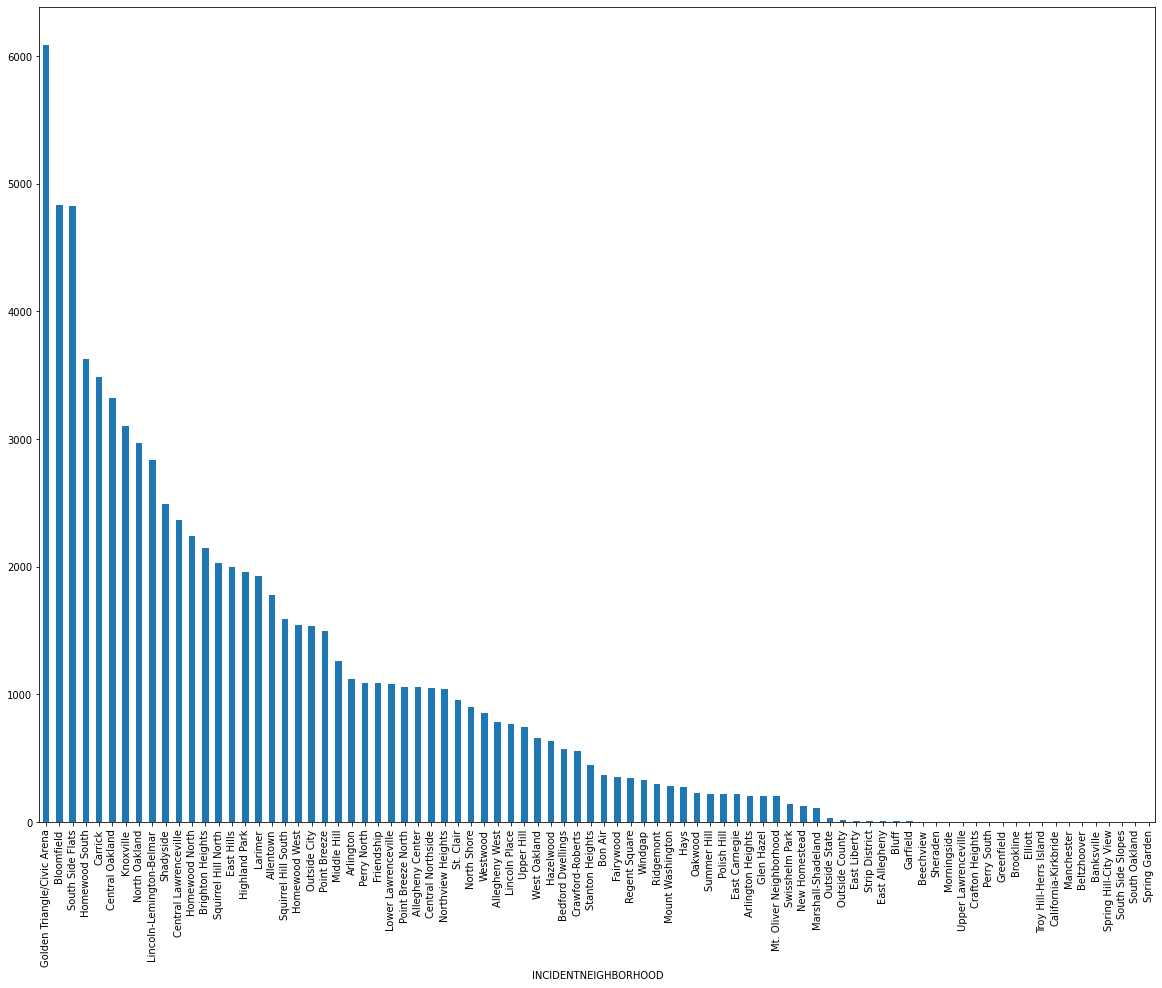

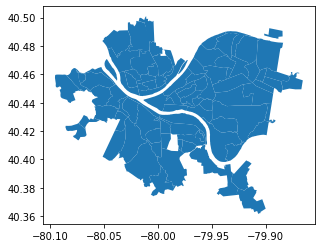

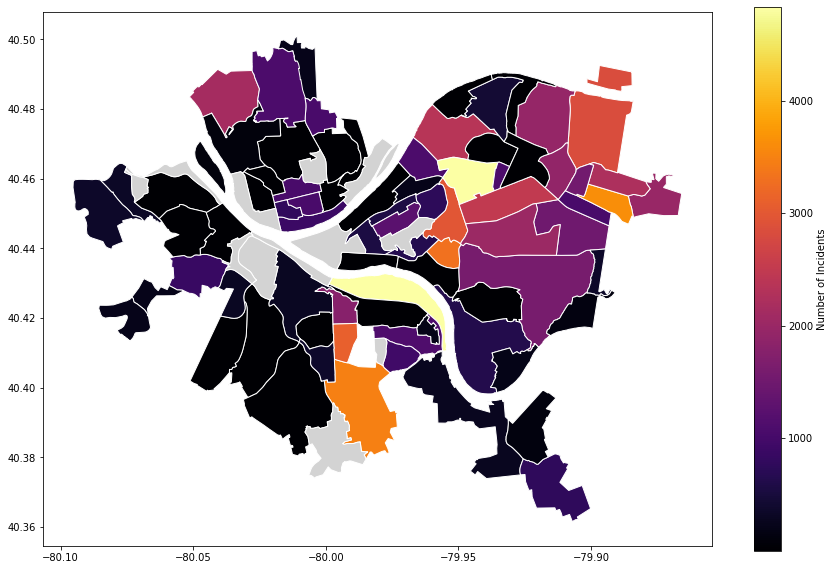

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
%matplotlib inline

reports = pd.read_csv("police.csv")
census = pd.read_csv("census.csv")


num_reports = reports.groupby("INCIDENTNEIGHBORHOOD").nunique()
num_sqmiles = census.groupby("hood")
#num_sqmiles.describe()
#having trouble getting census to properly group

num_reports = num_reports.sort_values('PK', ascending=False)
#num_sqmiles = num_sqmiles.sort_values(ascending=False)
print("std: ", num_reports["PK"].std())
print("mean: ", num_reports["PK"].mean())

num_reports["PK"].plot.bar(figsize=(20,15))
#print(num_reports["PK"])
#print(num_sqmiles["sqmiles"]) 

neighborhoods = geopandas.read_file("Pitt/Neighborhoods_.shp")
neighborhoods.plot()

reports_map = neighborhoods.merge(num_reports["PK"], how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')

reports_map[['hood','PK','geometry']]

reports_map.plot(column='PK', cmap='inferno', edgecolor="white", legend=True, legend_kwds={'label': "Number of Incidents"}, figsize=(15, 10), missing_kwds={"color": "lightgrey"})

for y in num_sqmiles["sqmiles"]:
    for x in num_reports["PK"]:
        if(num_reports['INCIDENTNEIGHBORHOOD']== num_sqmiles['hood']):
            print(x/y)


